#Philippines: Energy Use 
*Author:* Lj Miranda
|| *Website:* ljvmiranda.wordpress.com

I am investigating the country's energy use given the World Development Indicators 
dataset provided here in Kaggle. I am particularly interested to how the Philippines has been
performing over time, as well as how it performs compared with its South-East Asian Neighbors. If you have any questions
or suggestions, do not hesitate to reach me through the comments below. I would like to hear and learn from you!



In [1]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import fill_between

#Read Datasets
country = pd.read_csv('../input/Country.csv')
country_notes = pd.read_csv('../input/CountryNotes.csv')
indicators = pd.read_csv('../input/Indicators.csv')

#Stylistic Options
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
    


##Table of Contents

---
1. What percentage of the population has access to electricty?
    -  Access to electricity over time   
    -  Comparison to South-East Asian (SEA) countries
2. What constitutes my country's energy mix?
    - Energy Mix in the Philippines 
    - Comparison to South-East Asian (SEA) countries
        - Fossil-Fuel use
        - Renewable Energy Adoption
3. How are we consuming our energy? 
    - Electric Power Consumption over time 
    - Consumption footprint
    
    

##1. What percentage of the population has access to electricity?
The charts below show the percentage of the urban and rural population with access to electricity and the comparison of the country's performance with its neighbor south-east Asian nations.

###1.1 Access to electricity over time

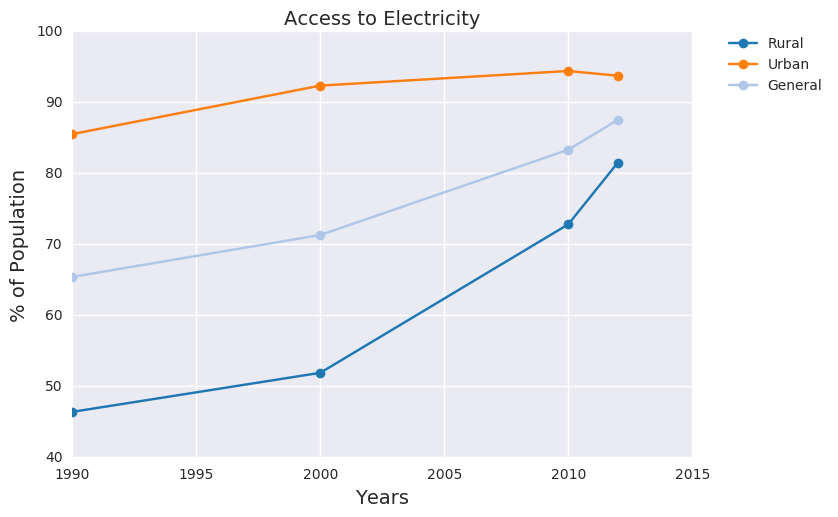

In [2]:
# Plot Access Line Chart for Rural and Urban Communities
df_elec_rural = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.ACCS.RU.ZS')]
df_elec_urban = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.ACCS.UR.ZS')]
df_elec_pop = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]

fig = plt.figure()

plt.plot(df_elec_rural.Year,df_elec_rural.Value,'o-',label='Rural',color=tableau20[0])
plt.plot(df_elec_urban.Year,df_elec_urban.Value,'o-',label='Urban',color=tableau20[2])
plt.plot(df_elec_pop.Year,df_elec_pop.Value,'o-',label='General',color=tableau20[1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Population',  fontsize=14)
plt.title('Access to Electricity', fontsize=14)

fig.savefig('access_electricity.pdf',format='pdf', dpi=300)

The chart above shows the population's access to electricity over a period of 20 years. Although there was a sharp division of resources in the 90s, access to this need is being 
resolved as time progresses. It is commendable that the government (as well as the private companies) 
has started putting effort to provide electricity to rural communities at the onset of the millenium.

It is also interesting to note that the years with a steeper slope started in 2010, and this can be 
credited to the previous administration (and the corresponding electricity conglomerates) for continuing 
the steep rise done in the previous years.

###1.2 Comparison to South-East Asian (SEA) countries
Note: *I cannot seem to find a South-East Asian tag in the World Bank dataset (there is an East Asia & Pacific tag, but I need to remove the countries that are not part of the ASEAN), so my workaround is to arrange the columns for each SEA country manually.*

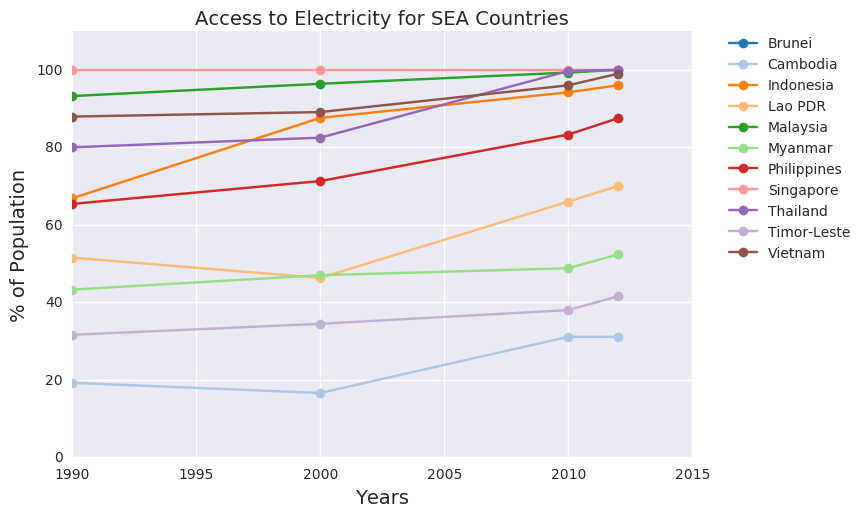

In [3]:
df_br_elec_pop = indicators[(indicators.CountryName=='Brunei')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_ca_elec_pop = indicators[(indicators.CountryName=='Cambodia')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_in_elec_pop = indicators[(indicators.CountryName=='Indonesia')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]

df_la_elec_pop = indicators[(indicators.CountryName=='Lao PDR')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_ma_elec_pop = indicators[(indicators.CountryName=='Malaysia')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_my_elec_pop = indicators[(indicators.CountryName=='Myanmar')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]

df_ph_elec_pop = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_si_elec_pop = indicators[(indicators.CountryName=='Singapore')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_th_elec_pop = indicators[(indicators.CountryName=='Thailand')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]

df_ti_elec_pop = indicators[(indicators.CountryName=='Timor-Leste')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_vi_elec_pop = indicators[(indicators.CountryName=='Vietnam')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]

fig = plt.figure()

plt.plot(df_br_elec_pop.Year,df_br_elec_pop.Value,'o-',label='Brunei',color=tableau20[0])
plt.plot(df_ca_elec_pop.Year,df_ca_elec_pop.Value,'o-',label='Cambodia',color=tableau20[1])
plt.plot(df_in_elec_pop.Year,df_in_elec_pop.Value,'o-',label='Indonesia',color=tableau20[2])

plt.plot(df_la_elec_pop.Year,df_la_elec_pop.Value,'o-',label='Lao PDR',color=tableau20[3])
plt.plot(df_ma_elec_pop.Year,df_ma_elec_pop.Value,'o-',label='Malaysia',color=tableau20[4])
plt.plot(df_my_elec_pop.Year,df_my_elec_pop.Value,'o-',label='Myanmar',color=tableau20[5])

plt.plot(df_ph_elec_pop.Year,df_ph_elec_pop.Value,'o-',label='Philippines',color=tableau20[6])
plt.plot(df_si_elec_pop.Year,df_si_elec_pop.Value,'o-',label='Singapore',color=tableau20[7])
plt.plot(df_th_elec_pop.Year,df_th_elec_pop.Value,'o-',label='Thailand',color=tableau20[8])

plt.plot(df_ti_elec_pop.Year,df_ti_elec_pop.Value,'o-',label='Timor-Leste',color=tableau20[9])
plt.plot(df_vi_elec_pop.Year,df_vi_elec_pop.Value,'o-',label='Vietnam',color=tableau20[10])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Population',  fontsize=14)
plt.title('Access to Electricity for SEA Countries', fontsize=14)
plt.ylim([0,110])
fig.savefig('access_electricity_sea.pdf',format='pdf', dpi=300)

One can observe that both Philippines and Indonesia started out similarly in the 90s, 
yet because of the steepness of Indonesia's slope in the chart, it was able to follow the 
leading countries&mdash;even overtaking Thailand in the year 2000. 
However, it may also be important to investigate the state of these countries before 
1990s in order to see how this progression came to be.

Top-performing countries in achieving the goal of universal access to electricity are
Singapore, Malaysia, and Thailand. Achieving almost a 100% by the turn of 2012. Singapore, 
on the other hand, is a consistent performer, allowing its population to have access to 
electricity for 20 years.

##2. What constitutes my country's energy mix?

Equally important in understanding the country's energy use is to know where our energy is being 
sourced from. This section will look into the different sources of energy&mdash;fossil fuels (coal, 
natural gas, petroleum), hydroelectric, and renewable in order to gain insight to where most of our
electricity is coming from. 

Moreover, a comparison with the SEA top-performers (in terms of providing electricity access) 
will be done in order to assess where the huge bulk of the electricity\textemdash that they are 
sourcing effectively to the population&mdash;is coming from. 

Lastly, it is also important to investigate the country's adoption to renewable energy, 
and compare this with our SEA neighbors. This can help identify trends, especially that using 
fossil fuels contributes much to our carbon footprint&mdash;given the devastating results of 
global warming and climate change.

###2.1 Energy Mix in the Philippines

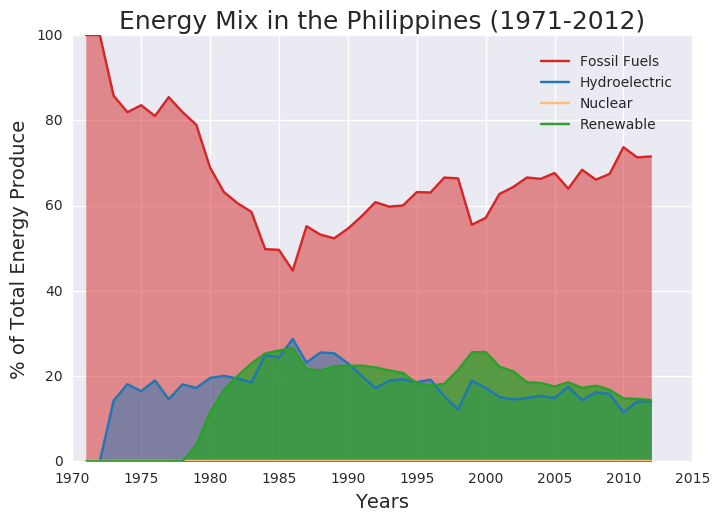

In [4]:
df_elec_fosl = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_elec_hydro = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.HYRO.ZS')]
df_elec_nucl = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.NUCL.ZS')]
df_elec_rnwx = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]


fig = plt.figure()

plt.plot(df_elec_fosl.Year,df_elec_fosl.Value,label='Fossil Fuels',color=tableau20[6])
plt.plot(df_elec_hydro.Year,df_elec_hydro.Value,label='Hydroelectric',color=tableau20[0])
plt.plot(df_elec_nucl.Year,df_elec_nucl.Value,label='Nuclear',color=tableau20[3])
plt.plot(df_elec_rnwx.Year,df_elec_rnwx.Value,label='Renewable',color=tableau20[4])


fill_between(df_elec_fosl.Year,df_elec_fosl.Value,0,alpha=0.5,color=tableau20[6])
fill_between(df_elec_hydro.Year,df_elec_hydro.Value,0,alpha=0.5,color=tableau20[0])
fill_between(df_elec_nucl.Year,df_elec_nucl.Value,0,alpha=0.5,color=tableau20[3])
fill_between(df_elec_rnwx.Year,df_elec_rnwx.Value,0,alpha=0.5,color=tableau20[4])
fill_between(df_elec_rnwx.Year,df_elec_rnwx.Value,0,alpha=0.5,color=tableau20[4])
#fill_between(x,y2,0,color='magenta')
#fill_between(x,y3,0,color='red')

plt.legend(loc=1, borderaxespad=1.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Total Energy Produce',  fontsize=14)
plt.title('Energy Mix in the Philippines (1971-2012)', fontsize=18)


fig.savefig('energy_mix.pdf',format='pdf', dpi=300)

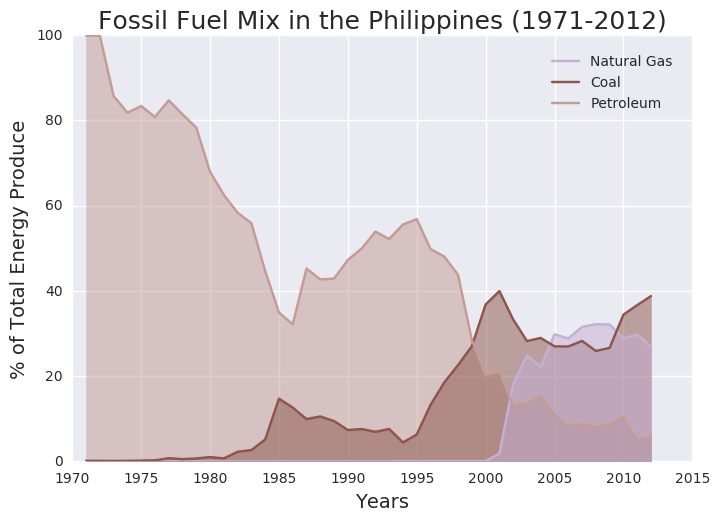

In [5]:
df_elec_ngas = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.NGAS.ZS')]
df_elec_coal = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.COAL.ZS')]
df_elec_petr = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.PETR.ZS')]

fig = plt.figure()

plt.plot(df_elec_ngas.Year,df_elec_ngas.Value,label='Natural Gas',color=tableau20[9])
plt.plot(df_elec_coal.Year,df_elec_coal.Value,label='Coal',color=tableau20[10])
plt.plot(df_elec_petr.Year,df_elec_petr.Value,label='Petroleum',color=tableau20[11])

fill_between(df_elec_petr.Year,df_elec_petr.Value,0,alpha=0.5,color=tableau20[11])
fill_between(df_elec_coal.Year,df_elec_coal.Value,0,alpha=0.5,color=tableau20[10])
fill_between(df_elec_ngas.Year,df_elec_ngas.Value,0,alpha=0.5,color=tableau20[9])



plt.legend(loc=1, borderaxespad=1.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Total Energy Produce',  fontsize=14)
plt.title('Fossil Fuel Mix in the Philippines (1971-2012)', fontsize=18)


fig.savefig('fossil_fuel_mix.pdf',format='pdf', dpi=300)

It is evident that the country is still reliant to fossil fuels as a main source of energy. 
Hydroelectric easily caught up and is a stable source to the fifth of our energy supply in the country. 
Interestingly, the contribution of renewable energy in the country is comparable to that of 
hydroelectric&mdash; and by combining the two together, one can see that these "clean" sources of 
energy contributes more than a fourth of our total energy mix. 


Looking at the country's fossil fuel mix, one can see that our use of petroleum has significantly 
dropped for the last 20 years. This has been replaced by other fossil fuels such as natural gas 
(during the 1980s) and coal (during the 2000s).  


###2.2 Comparison to SEA Neighbors
This section looks into the position of the Philippines with respect to the
use of fossil fuels and the adoption of renewable energy through time.

####2.2.1 Fossil Fuel Use

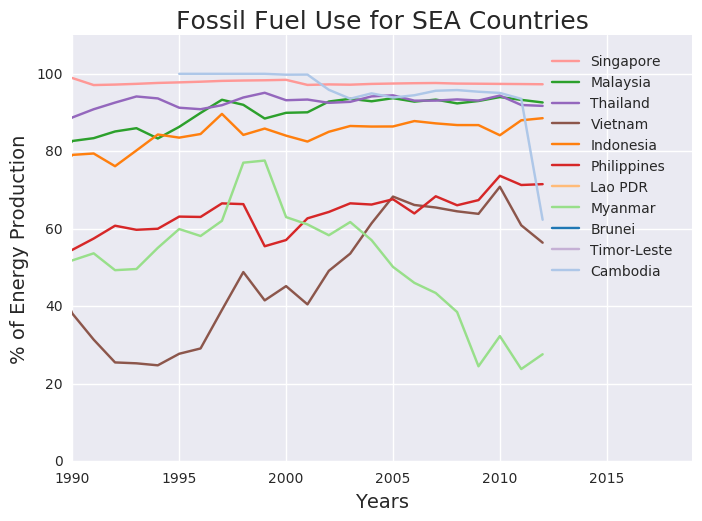

In [6]:
df_br_elec_pop = indicators[(indicators.CountryName=='Brunei')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_ca_elec_pop = indicators[(indicators.CountryName=='Cambodia')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_in_elec_pop = indicators[(indicators.CountryName=='Indonesia')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]

df_la_elec_pop = indicators[(indicators.CountryName=='Lao PDR')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_ma_elec_pop = indicators[(indicators.CountryName=='Malaysia')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_my_elec_pop = indicators[(indicators.CountryName=='Myanmar')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]

df_ph_elec_pop = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_si_elec_pop = indicators[(indicators.CountryName=='Singapore')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_th_elec_pop = indicators[(indicators.CountryName=='Thailand')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]

df_ti_elec_pop = indicators[(indicators.CountryName=='Timor-Leste')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_vi_elec_pop = indicators[(indicators.CountryName=='Vietnam')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]

fig = plt.figure()

plt.plot(df_si_elec_pop.Year,df_si_elec_pop.Value,label='Singapore',color=tableau20[7])
plt.plot(df_ma_elec_pop.Year,df_ma_elec_pop.Value,label='Malaysia',color=tableau20[4])
plt.plot(df_th_elec_pop.Year,df_th_elec_pop.Value,label='Thailand',color=tableau20[8])
plt.plot(df_vi_elec_pop.Year,df_vi_elec_pop.Value,label='Vietnam',color=tableau20[10])
plt.plot(df_in_elec_pop.Year,df_in_elec_pop.Value,label='Indonesia',color=tableau20[2])
plt.plot(df_ph_elec_pop.Year,df_ph_elec_pop.Value,label='Philippines',color=tableau20[6])
plt.plot(df_la_elec_pop.Year,df_la_elec_pop.Value,label='Lao PDR',color=tableau20[3])
plt.plot(df_my_elec_pop.Year,df_my_elec_pop.Value,label='Myanmar',color=tableau20[5])
plt.plot(df_br_elec_pop.Year,df_br_elec_pop.Value,label='Brunei',color=tableau20[0])
plt.plot(df_ti_elec_pop.Year,df_ti_elec_pop.Value,label='Timor-Leste',color=tableau20[9])
plt.plot(df_ca_elec_pop.Year,df_ca_elec_pop.Value,label='Cambodia',color=tableau20[1])


plt.legend(loc=1, borderaxespad=1.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Energy Production',  fontsize=14)
plt.title('Fossil Fuel Use for SEA Countries', fontsize=18)

plt.ylim([0,110])
plt.xlim([1990,2019])
fig.savefig('fossil_fuel_electricity_sea.pdf',format='pdf', dpi=300)
fig.savefig('fossil_fuel_electricity_sea.png',format='png', dpi=300)

The use of fossil fuel in the energy mix is shown in the figure above. It is interesting
that the top-players in providing access to electricity in their respective
population&mdash;Singapore, Thailand, and Malaysia&mdash;are sourcing their energy
mostly from fossil fuels.

The Philippines, on the other hand, is fourth from below in the level of
fossil fuel that constitutes the energy mix. The first in this list is Myanmar, where fossil fuel constitutes 20 to 40% of the energy mix.

####2.2.2 Renewable Energy Adoption

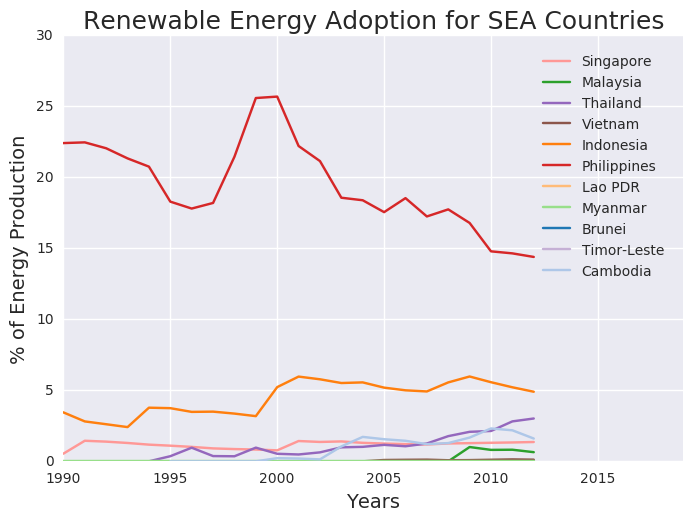

In [7]:
df_br_elec_pop = indicators[(indicators.CountryName=='Brunei')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_ca_elec_pop = indicators[(indicators.CountryName=='Cambodia')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_in_elec_pop = indicators[(indicators.CountryName=='Indonesia')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]

df_la_elec_pop = indicators[(indicators.CountryName=='Lao PDR')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_ma_elec_pop = indicators[(indicators.CountryName=='Malaysia')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_my_elec_pop = indicators[(indicators.CountryName=='Myanmar')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]

df_ph_elec_pop = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_si_elec_pop = indicators[(indicators.CountryName=='Singapore')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_th_elec_pop = indicators[(indicators.CountryName=='Thailand')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]

df_ti_elec_pop = indicators[(indicators.CountryName=='Timor-Leste')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_vi_elec_pop = indicators[(indicators.CountryName=='Vietnam')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]

fig = plt.figure()

plt.plot(df_si_elec_pop.Year,df_si_elec_pop.Value,label='Singapore',color=tableau20[7])
plt.plot(df_ma_elec_pop.Year,df_ma_elec_pop.Value,label='Malaysia',color=tableau20[4])
plt.plot(df_th_elec_pop.Year,df_th_elec_pop.Value,label='Thailand',color=tableau20[8])
plt.plot(df_vi_elec_pop.Year,df_vi_elec_pop.Value,label='Vietnam',color=tableau20[10])
plt.plot(df_in_elec_pop.Year,df_in_elec_pop.Value,label='Indonesia',color=tableau20[2])
plt.plot(df_ph_elec_pop.Year,df_ph_elec_pop.Value,label='Philippines',color=tableau20[6])
plt.plot(df_la_elec_pop.Year,df_la_elec_pop.Value,label='Lao PDR',color=tableau20[3])
plt.plot(df_my_elec_pop.Year,df_my_elec_pop.Value,label='Myanmar',color=tableau20[5])
plt.plot(df_br_elec_pop.Year,df_br_elec_pop.Value,label='Brunei',color=tableau20[0])
plt.plot(df_ti_elec_pop.Year,df_ti_elec_pop.Value,label='Timor-Leste',color=tableau20[9])
plt.plot(df_ca_elec_pop.Year,df_ca_elec_pop.Value,label='Cambodia',color=tableau20[1])


plt.legend(loc=1, borderaxespad=1.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Energy Production',  fontsize=14)
plt.title('Renewable Energy Adoption for SEA Countries', fontsize=18)

plt.ylim([0,30])
plt.xlim([1990,2019])
fig.savefig('renewable_electricity_sea.pdf',format='pdf', dpi=300)
fig.savefig('renewable_electricity_sea.png',format='png', dpi=300)

The figure above shows the renewable energy adoption of different SEA
countries over time. It is interesting to note that the Philippines is leading
the renewable energy race, then followed by Indonesia and the rest of the
SEA countries.

##3. How are we consuming our energy?
With the knowledge of the country's energy sources, the next step is to un-
derstand how we consume that energy. This section will first look into the
country's electric power consumption over time, then look at our consump-
tion footprint&mdash;particularly that of carbon emissions and other greenhouse
gases.


###3.1 Electric power consumption over time

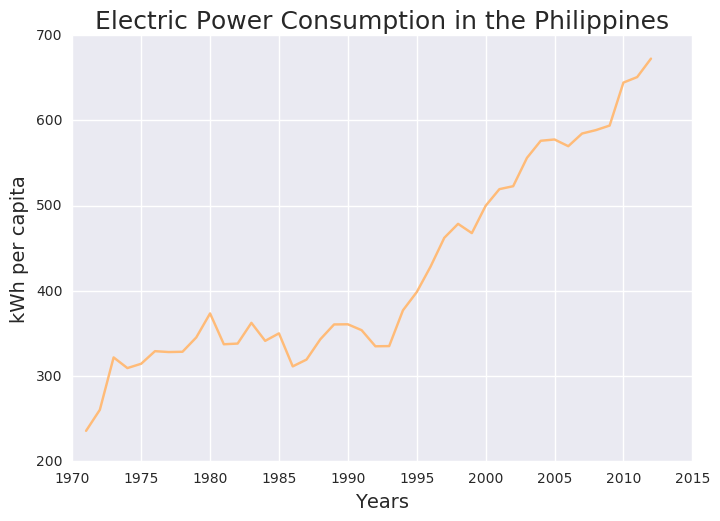

In [8]:
df_elec_use = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]


fig = plt.figure()

plt.plot(df_elec_use.Year,df_elec_use.Value,color=tableau20[3])

#plt.legend(loc=4, borderaxespad=1.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('kWh per capita',  fontsize=14)
plt.title('Electric Power Consumption in the Philippines', fontsize=18)


fig.savefig('electric_consumption.pdf',format='pdf', dpi=300)
fig.savefig('electric_consumption.png',format='png', dpi=300)

It can be observed from the chart above that the power consumption
in the country has increased from about 200 kWh to 700 kWh over time.
It is expected that this consumption will increase, and this corresponds to
unprecedented eects in our environment; as we continue utilizing dierent
sources for our electricity use.

###3.2 Consumption footprint

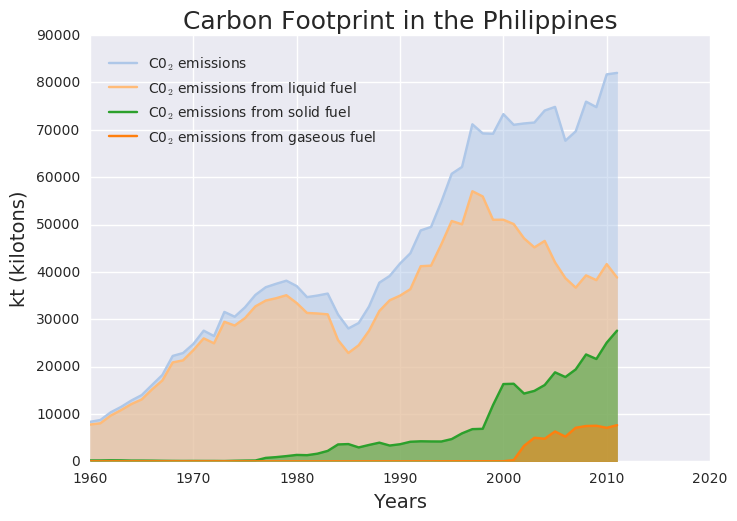

In [9]:
df_elec_emi = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EN.ATM.CO2E.KT')]
df_elec_gf = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EN.ATM.CO2E.GF.KT')]
df_elec_lf = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EN.ATM.CO2E.LF.KT')]
df_elec_sf = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EN.ATM.CO2E.SF.KT')]

fig = plt.figure()

plt.plot(df_elec_emi.Year,df_elec_emi.Value,label='C0$_2$ emissions',color=tableau20[1])
plt.plot(df_elec_lf.Year,df_elec_lf.Value,label='C0$_2$ emissions from liquid fuel',color=tableau20[3])
plt.plot(df_elec_sf.Year,df_elec_sf.Value,label='C0$_2$ emissions from solid fuel',color=tableau20[4])
plt.plot(df_elec_gf.Year,df_elec_gf.Value,label='C0$_2$ emissions from gaseous fuel',color=tableau20[2])

fill_between(df_elec_emi.Year,df_elec_emi.Value,0,alpha=0.5,color=tableau20[1])
fill_between(df_elec_lf.Year,df_elec_lf.Value,0,alpha=0.5,color=tableau20[3])
fill_between(df_elec_sf.Year,df_elec_sf.Value,0,alpha=0.5,color=tableau20[4])
fill_between(df_elec_gf.Year,df_elec_gf.Value,0,alpha=0.5,color=tableau20[2])

plt.legend(loc=2, borderaxespad=1.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('kt (kilotons)',  fontsize=14)
plt.title('Carbon Footprint in the Philippines', fontsize=18)


fig.savefig('co2_emissions.pdf',format='pdf', dpi=300)
fig.savefig('co2_emissions.png',format='png', dpi=300)

These unprecedented eects are what we often call as our consumption foot-
print, for it leaves traces in nature that we may not expect. This section will
look into our carbon footprint and different greenhouse gases, taken mainly
from our use of fossil fuels as energy source, and through our continued
consumption of electricity (managed or not).

Similar to the rise of our electric consumption, our carbon footprint has
increased steadily for the last few years. Different sources have contributed
to this, the first mainly by liquid fuel, then followed by solid fuel and then
by gaseous fuel. It is expected that this trend will continue to rise, and its
effects might be felt if left unmitigated.

##Conclusion
This report looks into World Bank's World Development Indicators in order
to understand the energy situation in the Philippines. Three aspects were
considered|the access to electricity of the population, the energy mix, and
the energy consumption and footprint.

The country's access to electricity is being resolved through time, increasing the 
rural population's access for the last twenty years. However,
much work is to be done, for the country is only 6th compared to its SEA
neighbors in this category. However, much can be said in the country's energy mix, 
for the use of fossil fuels (although still in majority) is being
offset by hydroelectric and renewable sources of energy. In fact, the country
is leading among its SEA neighbors with respect to the renewable energy
adoption. Lastly, the electricity consumption of the country is still on the
rise, and will still be, given the trend for the last twenty years. This can
then be followed by an increasing carbon footprint, which may lead to unprecedented effects if left unmitigated.